In [24]:
!which python

/c/Users/MANNAN SHRAMA/Documents/Sem-4/MLPR/Project/GastroCAD/venv/Scripts/python


In [75]:
import os
import pandas as pd

print(os.getcwd())

c:\Users\MANNAN SHRAMA\Documents\Sem-4\MLPR\Project\GastroCAD\src\preprocessing


In [83]:
notebook_dir = os.getcwd()
image_classification = os.path.join(notebook_dir, "..", "..", "data", "gastroHUN", "official_splits", "image_classification.csv")

df = pd.read_csv(image_classification)
print( df.head().to_string() )

   Unnamed: 0  num patient                                  filename FG1 (Team A) FG2 (Team A) G1 (Team B) G2 (Team B) Complete agreement Triple agreement FG agreement G agreement FG1-G1 agreement FG1-G2 agreement FG2-G1 agreement FG2-G2 agreement set_type
0           0            1  9f8514ab-3839-439e-ad8b-67ee6a6947b0.jpg           A1           A1          A1          A1                 A1               A1           A1          A1               A1               A1               A1               A1    Train
1           1            1  b929a2a7-dd6e-4701-a226-f486ca2cc0e2.jpg           L1           A1          A1          A1                NaN               A1          NaN          A1              NaN              NaN               A1               A1    Train
2           2            1  fc98b211-07ed-47a9-bfc3-04cd593a2c28.jpg           P1           G1          G1          G1                NaN               G1          NaN          G1              NaN              NaN               G

In [84]:
# Finalize Label: First try "Complete_Agreement", then "FG", then "FG2-G1", and so on
# Performing this on the complete dataset

df["label"] = ( df["Complete agreement"].fillna(df["FG agreement"]) ).fillna( df["FG2-G1 agreement"] ).fillna(df["FG1-G2 agreement"]).fillna(df["G agreement"]).fillna(df["FG1-G1 agreement"]).fillna(df["FG2-G2 agreement"]).fillna(df["Triple agreement"])

# Check if any labels are still missing
missing_labels = df["label"].isnull().sum()
print(f"Missing labels after filling: {missing_labels}")


# Drop the rows which still have missing labels (Even if we loose 75 rows, not a big deal)
df = df.dropna(subset=["label"])

# Verifying rows are dropped
missing_labels = df["label"].isnull().sum()
print(f"Missing labels after dropping: {missing_labels}")


Missing labels after filling: 75
Missing labels after dropping: 0


In [85]:
print(df["label"].nunique())
print(df["label"].unique())

23
['A1' 'G1' 'G2' 'P2' 'L2' 'G3' 'P3' 'L3' 'G4' 'L4' 'P5' 'A2' 'L6' 'P6'
 'OTHERCLASS' 'P1' 'A3' 'L5' 'A6' 'L1' 'A5' 'P4' 'A4']


In [87]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check unique patient IDs
print(f"Total unique patients: {df['num patient'].nunique()}")

# No. of rows in the dataset
print(f"Number of rows in the dataset: {len(df)}")

print(8834-75)

Number of duplicate rows: 0
Total unique patients: 387
Number of rows in the dataset: 8759
8759


In [88]:
# Checking if each and every image file mentioned in the data-set exists

image_base_dir = os.path.join(notebook_dir, "..", "..", "data", "gastroHUN", "Labeled Images")

# Function to check missing images
def check_images_exist(df, image_base_dir):
  missing_images = []
  present_image_count = 0
  for _, row in df.iterrows():
    image_path = os.path.join(image_base_dir, str(row["num patient"]), row["filename"])
    if not os.path.exists(image_path):
      missing_images.append(image_path)
    else:
      present_image_count += 1
  return missing_images, present_image_count

missing_images, present_image_count = check_images_exist(df, image_base_dir)
print(f"Missing images count: {len(missing_images)}")
print(f"Present images count: {present_image_count}")


Missing images count: 0
Present images count: 8759


In [89]:
print( df["set_type"].unique() )


['Train' 'Test' 'Validation']


In [90]:
# Split dataset based on 'set_type'
df_train = df[df["set_type"] == "Train"]
df_val = df[df["set_type"] == "Validation"]
df_test = df[df["set_type"] == "Test"]

# Print dataset sizes
print(f"Train set size: {len(df_train)}\nValidation set size: {len(df_val)}\nTest set size: {len(df_test)}")

Train set size: 6108
Validation set size: 1306
Test set size: 1345


## Performing EDA (ONLY on the training dataset)

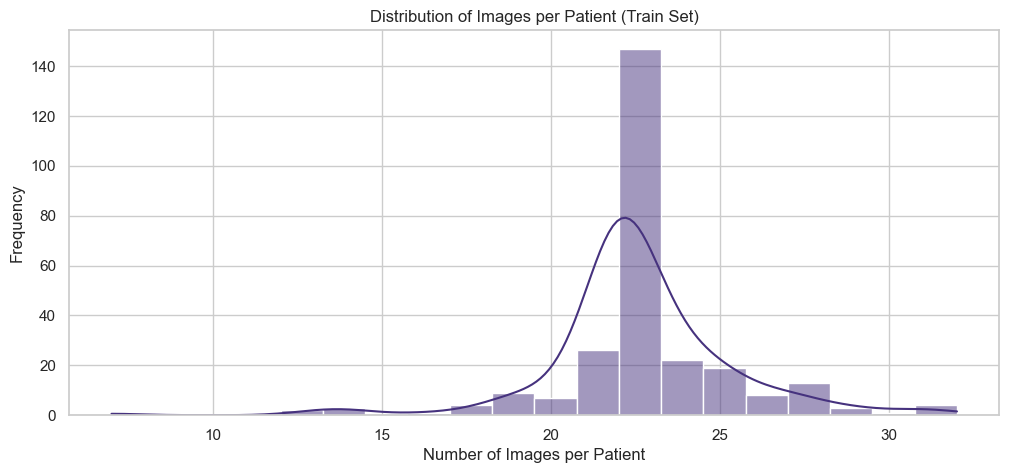

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a universal style and color palette for all plots
sns.set_theme(style="whitegrid", palette="viridis")

# Count images per patient (Train set only)
train_patient_counts = df_train["num patient"].value_counts()
train_patient_counts

plt.figure(figsize=(12, 5))
sns.histplot(train_patient_counts, bins=20, kde=True)
plt.xlabel("Number of Images per Patient")
plt.ylabel("Frequency")
plt.title("Distribution of Images per Patient (Train Set)")
plt.show()


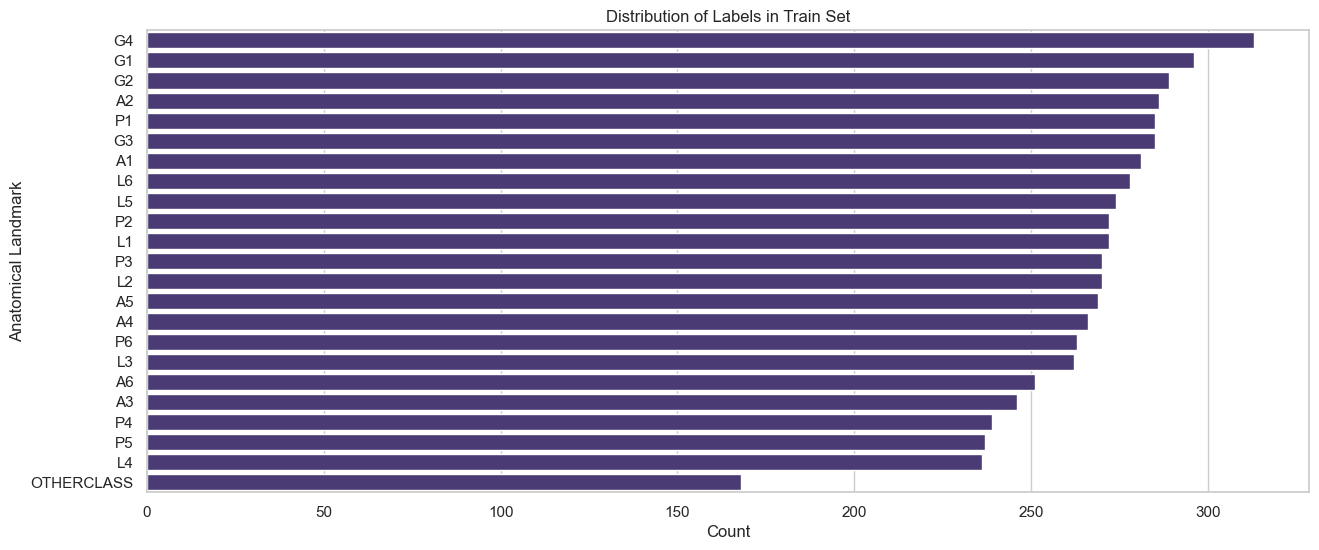

In [103]:
# Label Distribution(Train Set)

plt.figure(figsize=(15, 6))
sns.countplot(y=df_train["label"], order=df_train["label"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Anatomical Landmark")
plt.title("Distribution of Labels in Train Set")
plt.show()


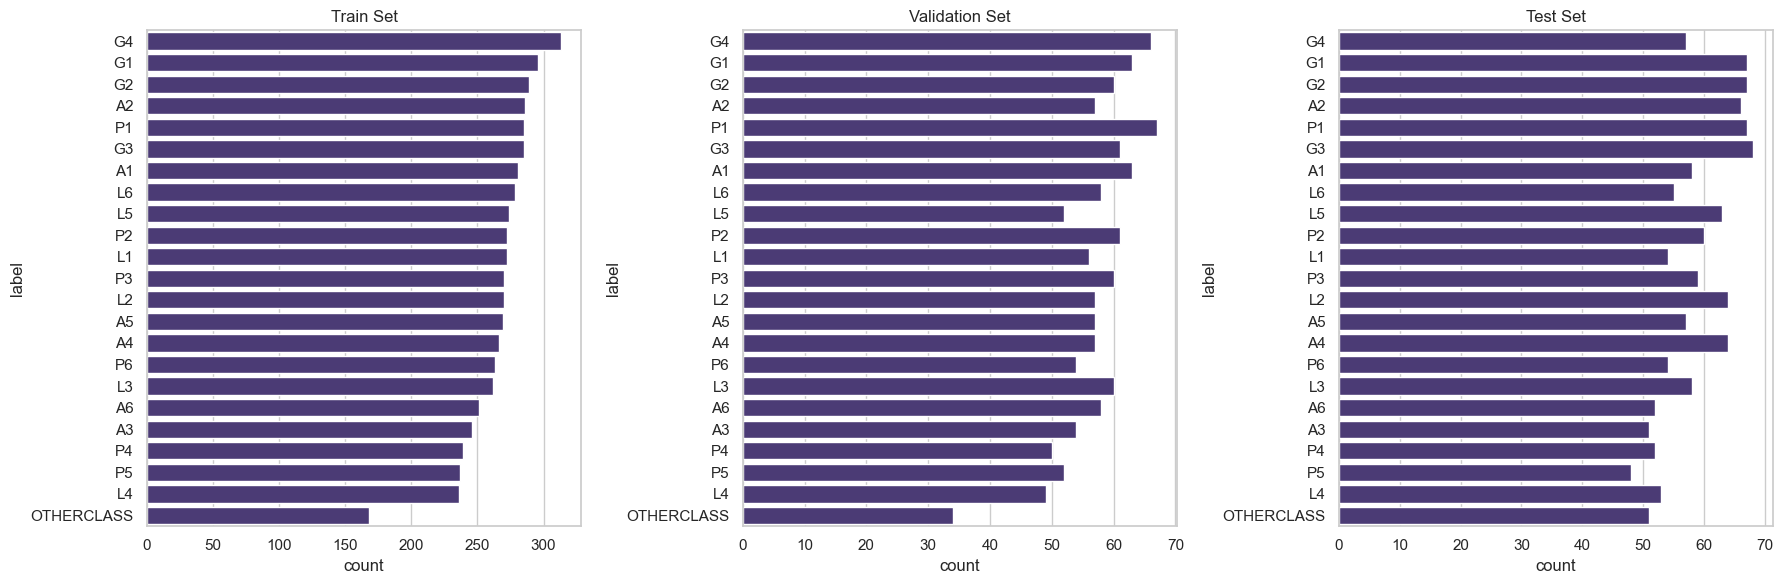

In [104]:
# Compare Class Distribution Across Train, Validation, and Test Sets

plt.figure(figsize=(18, 6))

# Train distribution
plt.subplot(1, 3, 1)
sns.countplot(y=df_train["label"], order=df_train["label"].value_counts().index)
plt.title("Train Set")

# Validation distribution
plt.subplot(1, 3, 2)
sns.countplot(y=df_val["label"], order=df_train["label"].value_counts().index)
plt.title("Validation Set")

# Test distribution
plt.subplot(1, 3, 3)
sns.countplot(y=df_test["label"], order=df_train["label"].value_counts().index)
plt.title("Test Set")

plt.tight_layout()
plt.show()
